In [56]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [57]:
import pandas as pd
#function to load data with pandas
def fetch_data(URL):
    data = pd.read_csv(URL)
    return data
    

In [58]:
#loading data with pandas
TRAIN_DATA_URL = r"C:\Users\fredl\Desktop\projects\python\UFPA\deeplearning\santander-customer-satisfaction\train.csv"
TEST_DATA_URL = r"C:\Users\fredl\Desktop\projects\python\UFPA\deeplearning\santander-customer-satisfaction\test.csv"
train_data = fetch_data(TRAIN_DATA_URL)
test_data = fetch_data(TEST_DATA_URL)

In [59]:
#checking all column names
keys = train_data.keys()
for i in keys:
    print(i)

ID
var3
var15
imp_ent_var16_ult1
imp_op_var39_comer_ult1
imp_op_var39_comer_ult3
imp_op_var40_comer_ult1
imp_op_var40_comer_ult3
imp_op_var40_efect_ult1
imp_op_var40_efect_ult3
imp_op_var40_ult1
imp_op_var41_comer_ult1
imp_op_var41_comer_ult3
imp_op_var41_efect_ult1
imp_op_var41_efect_ult3
imp_op_var41_ult1
imp_op_var39_efect_ult1
imp_op_var39_efect_ult3
imp_op_var39_ult1
imp_sal_var16_ult1
ind_var1_0
ind_var1
ind_var2_0
ind_var2
ind_var5_0
ind_var5
ind_var6_0
ind_var6
ind_var8_0
ind_var8
ind_var12_0
ind_var12
ind_var13_0
ind_var13_corto_0
ind_var13_corto
ind_var13_largo_0
ind_var13_largo
ind_var13_medio_0
ind_var13_medio
ind_var13
ind_var14_0
ind_var14
ind_var17_0
ind_var17
ind_var18_0
ind_var18
ind_var19
ind_var20_0
ind_var20
ind_var24_0
ind_var24
ind_var25_cte
ind_var26_0
ind_var26_cte
ind_var26
ind_var25_0
ind_var25
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var29_0
ind_var29
ind_var30_0
ind_var30
ind_var31_0
ind_var31
ind_var32_cte
ind_var32_0
ind_var32
ind_var33_0
ind_var33


In [60]:
#printing dataa information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [61]:
#checking basic statistics for all columns
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


<AxesSubplot:>

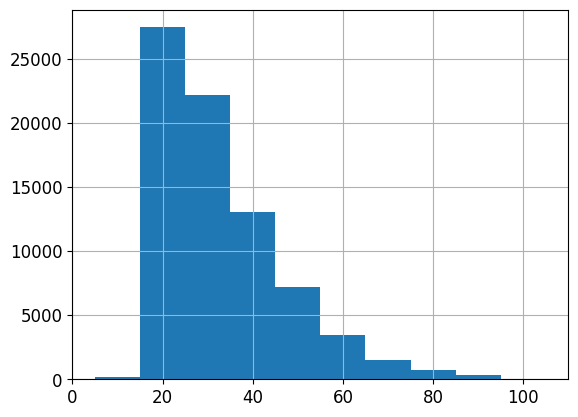

In [62]:
train_data["var15"].hist()

In [87]:
import tensorflow as tf

#function to transform a pandas dataframe into two arrays: one conataining data and the other containing class labels

def dataframe_to_dataset(df):
    dataframe = df.copy()
    X = np.array(dataframe.drop([370],axis = 1))
    y= np.array(df[370])
    return X,y

In [88]:
test = np.array(train_data)

sat = []
insat = []

for i in test:
    if(i[-1] == 0):
        sat.append(i)
    else:
        insat.append(i)

print(len(sat[:3008]),len(insat))

dados = sat[:3008] + insat

df = pd.DataFrame(dados)

3008 3008


In [89]:
#creating the training data sets
train_set,y = dataframe_to_dataset(df)
labels = tf.keras.utils.to_categorical(y,num_classes=2)

In [90]:
#checking shape of data
print(train_set.shape)
print(labels.shape)

(6016, 370)
(6016, 2)


In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_set, y, test_size=0.15, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=2)

In [ ]:
#checking label sitribution
cust_st = train_data[train_data['TARGET'] == 1].TARGET.count()
cust_cnt = train_data.TARGET.count()

print("Ratio of satisify is : {0:.3f}%".format(cust_st / cust_cnt * 100))

In [ ]:
#notice that the only 3.95% of dataset represents satisfaction and the remaning are unsatisfied
#the dataset is unbalanced

In [214]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold


#neural network implementation using keras and tensorflow
def create_model():
    input = keras.Input(shape=(370))
    #network layers
    x = layers.Dense(32, activation="sigmoid")(input)
    out = layers.Dense(2, activation="softmax")(x)
    model  = keras.Model(inputs  = [input] , outputs = [out])
    bc = "binary_crossentropy"
    opt = tf.keras.optimizers.Adam(learning_rate=1e-8, decay=1e-4)
    model.compile(optimizer= 'Adam',loss = "mse",metrics="accuracy")
    return model

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)   
i = 0
model = create_model()
for train, test in kfold.split(train_set, y):
    labels = tf.keras.utils.to_categorical(y,num_classes=2)
    print ("Running Fold", i, "/", 10)
    model.fit(train_set[train], labels[train], epochs=500, batch_size=100, verbose = 1,validation_data=(train_set[test], labels[test]))
    i=i+1

Running Fold 0 / 10
Epoch 1/500
55/55 [==============================] - 1s 7ms/step - loss: 0.1894 - accuracy: 0.6668 - val_loss: 0.1378 - val_accuracy: 0.8987
Epoch 2/500
55/55 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.8923 - val_loss: 0.0993 - val_accuracy: 0.8854
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9086 - val_loss: 0.0742 - val_accuracy: 0.9219
Epoch 4/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0721 - accuracy: 0.9128 - val_loss: 0.0723 - val_accuracy: 0.9236
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9121 - val_loss: 0.0735 - val_accuracy: 0.9086
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9250 - val_loss: 0.0615 - val_accuracy: 0.9219
Epoch 7/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0587 - accuracy: 0.9350 - val_loss: 0.0519 - val_accuracy: 

55/55 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9407 - val_loss: 0.0484 - val_accuracy: 0.9452
Epoch 59/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9450 - val_loss: 0.0467 - val_accuracy: 0.9452
Epoch 60/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9446 - val_loss: 0.0440 - val_accuracy: 0.9502
Epoch 61/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9348 - val_loss: 0.0478 - val_accuracy: 0.9435
Epoch 62/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9409 - val_loss: 0.0468 - val_accuracy: 0.9419
Epoch 63/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9372 - val_loss: 0.0653 - val_accuracy: 0.9336
Epoch 64/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9370 - val_loss: 0.0658 - val_accuracy: 0.9319
Epoch 65/500
55/55 

Epoch 116/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0517 - accuracy: 0.9426 - val_loss: 0.0537 - val_accuracy: 0.9402
Epoch 117/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9426 - val_loss: 0.0537 - val_accuracy: 0.9402
Epoch 118/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9427 - val_loss: 0.0537 - val_accuracy: 0.9402
Epoch 119/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9427 - val_loss: 0.0537 - val_accuracy: 0.9402
Epoch 120/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9427 - val_loss: 0.0536 - val_accuracy: 0.9402
Epoch 121/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9427 - val_loss: 0.0536 - val_accuracy: 0.9402
Epoch 122/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9427 - val_loss: 0.0536 - val_accuracy: 0.9402

55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9322 - val_loss: 0.0647 - val_accuracy: 0.9269
Epoch 174/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0647 - val_accuracy: 0.9269
Epoch 175/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9322 - val_loss: 0.0646 - val_accuracy: 0.9269
Epoch 176/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9322 - val_loss: 0.0645 - val_accuracy: 0.9269
Epoch 177/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9322 - val_loss: 0.0645 - val_accuracy: 0.9269
Epoch 178/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0645 - val_accuracy: 0.9269
Epoch 179/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0645 - val_accuracy: 0.9269
Epoch 180/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9326 - val_loss: 0.0642 - val_accuracy: 0.9269
Epoch 231/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 232/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 233/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0642 - val_accuracy: 0.9269
Epoch 234/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 235/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 236/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9326 - val_loss: 0.0642 - val_accuracy: 0.9269
Epoch 237/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0640 - val_accuracy: 0.9269
Epoch 288/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 289/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0640 - val_accuracy: 0.9269
Epoch 290/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0640 - val_accuracy: 0.9269
Epoch 291/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0641 - val_accuracy: 0.9269
Epoch 292/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9328 - val_loss: 0.0640 - val_accuracy: 0.9269
Epoch 293/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0640 - val_accuracy: 0.9269
Epoch 294/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9254 - val_loss: 0.0729 - val_accuracy: 0.9169
Epoch 345/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9328 - val_loss: 0.0533 - val_accuracy: 0.9435
Epoch 346/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9433 - val_loss: 0.0518 - val_accuracy: 0.9452
Epoch 347/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9427 - val_loss: 0.0543 - val_accuracy: 0.9419
Epoch 348/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9372 - val_loss: 0.0621 - val_accuracy: 0.9319
Epoch 349/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0586 - accuracy: 0.9344 - val_loss: 0.0655 - val_accuracy: 0.9269
Epoch 350/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9322 - val_loss: 0.0665 - val_accuracy: 0.9252
Epoch 351/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9318 - val_loss: 0.0656 - val_accuracy: 0.9252
Epoch 402/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9320 - val_loss: 0.0657 - val_accuracy: 0.9252
Epoch 403/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9317 - val_loss: 0.0656 - val_accuracy: 0.9252
Epoch 404/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9317 - val_loss: 0.0657 - val_accuracy: 0.9252
Epoch 405/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9317 - val_loss: 0.0656 - val_accuracy: 0.9252
Epoch 406/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9318 - val_loss: 0.0659 - val_accuracy: 0.9252
Epoch 407/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9318 - val_loss: 0.0658 - val_accuracy: 0.9252
Epoch 408/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9320 - val_loss: 0.0658 - val_accuracy: 0.9252
Epoch 459/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9318 - val_loss: 0.0658 - val_accuracy: 0.9252
Epoch 460/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9320 - val_loss: 0.0657 - val_accuracy: 0.9252
Epoch 461/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9322 - val_loss: 0.0658 - val_accuracy: 0.9252
Epoch 462/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9320 - val_loss: 0.0658 - val_accuracy: 0.9252
Epoch 463/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9322 - val_loss: 0.0657 - val_accuracy: 0.9252
Epoch 464/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9322 - val_loss: 0.0657 - val_accuracy: 0.9252
Epoch 465/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 16/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 17/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 18/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 19/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 20/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 21/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9324 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 22/500
55/55 

Epoch 73/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 74/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 75/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 76/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 77/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 78/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0626 - val_accuracy: 0.9269
Epoch 79/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9326 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 131/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 132/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 133/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 134/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9328 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 135/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9328 - val_loss: 0.0628 - val_accuracy: 0.9269
Epoch 136/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9328 - val_loss: 0.0627 - val_accuracy: 0.9269
Epoch 137/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9390 - val_loss: 0.0538 - val_accuracy: 0.9336
Epoch 188/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9392 - val_loss: 0.0522 - val_accuracy: 0.9336
Epoch 189/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9392 - val_loss: 0.0628 - val_accuracy: 0.9336
Epoch 190/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9389 - val_loss: 0.0568 - val_accuracy: 0.9336
Epoch 191/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9389 - val_loss: 0.0568 - val_accuracy: 0.9336
Epoch 192/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9389 - val_loss: 0.0568 - val_accuracy: 0.9336
Epoch 193/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9389 - val_loss: 0.0568 - val_accuracy: 0.9336
Epoch 194/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 245/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 246/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9324 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 247/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 248/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 249/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 250/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 251/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 302/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9326 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 303/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 304/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 305/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9322 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 306/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0633 - val_accuracy: 0.9252
Epoch 307/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9317 - val_loss: 0.0633 - val_accuracy: 0.9252
Epoch 308/500

55/55 [==============================] - 0s 5ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0632 - val_accuracy: 0.9252
Epoch 359/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0632 - val_accuracy: 0.9252
Epoch 360/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0633 - val_accuracy: 0.9252
Epoch 361/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0632 - val_accuracy: 0.9252
Epoch 362/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0633 - val_accuracy: 0.9252
Epoch 363/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0632 - val_accuracy: 0.9252
Epoch 364/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0633 - val_accuracy: 0.9252
Epoch 365/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0599 - accuracy: 0.9320 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 416/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 417/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 418/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9320 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 419/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9320 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 420/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 421/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9318 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 422/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 473/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 474/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 475/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 476/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9318 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 477/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0634 - val_accuracy: 0.9252
Epoch 478/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9322 - val_loss: 0.0635 - val_accuracy: 0.9252
Epoch 479/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9383 - val_loss: 0.0320 - val_accuracy: 0.9668
Epoch 30/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9383 - val_loss: 0.0319 - val_accuracy: 0.9684
Epoch 31/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9389 - val_loss: 0.0320 - val_accuracy: 0.9684
Epoch 32/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9389 - val_loss: 0.0318 - val_accuracy: 0.9684
Epoch 33/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9389 - val_loss: 0.0318 - val_accuracy: 0.9684
Epoch 34/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9389 - val_loss: 0.0318 - val_accuracy: 0.9684
Epoch 35/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.9389 - val_loss: 0.0305 - val_accuracy: 0.9701
Epoch 36/500
55/55 

Epoch 87/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9392 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 88/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9390 - val_loss: 0.0304 - val_accuracy: 0.9701
Epoch 89/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9392 - val_loss: 0.0302 - val_accuracy: 0.9701
Epoch 90/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9392 - val_loss: 0.0301 - val_accuracy: 0.9701
Epoch 91/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 92/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9392 - val_loss: 0.0302 - val_accuracy: 0.9701
Epoch 93/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9390 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0302 - val_accuracy: 0.9701
Epoch 145/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0299 - val_accuracy: 0.9701
Epoch 146/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9392 - val_loss: 0.0303 - val_accuracy: 0.9701
Epoch 147/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0301 - val_accuracy: 0.9701
Epoch 148/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 149/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 150/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9394 - val_loss: 0.0298 - val_accuracy: 0.9701
Epoch 151/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0302 - val_accuracy: 0.9701
Epoch 202/500
55/55 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 203/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0301 - val_accuracy: 0.9701
Epoch 204/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0303 - val_accuracy: 0.9701
Epoch 205/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 0.9701
Epoch 206/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0298 - val_accuracy: 0.9701
Epoch 207/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9394 - val_loss: 0.0301 - val_accuracy: 0.9701
Epoch 208/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9385 - val_loss: 0.0377 - val_accuracy: 0.9601
Epoch 259/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9387 - val_loss: 0.0376 - val_accuracy: 0.9601
Epoch 260/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9387 - val_loss: 0.0525 - val_accuracy: 0.9419
Epoch 261/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9113 - val_loss: 0.0393 - val_accuracy: 0.9468
Epoch 262/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9254 - val_loss: 0.0360 - val_accuracy: 0.9601
Epoch 263/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0562 - accuracy: 0.9387 - val_loss: 0.0344 - val_accuracy: 0.9635
Epoch 264/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.9389 - val_loss: 0.0337 - val_accuracy: 0.9635
Epoch 265/500

55/55 [==============================] - 0s 6ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0335 - val_accuracy: 0.9635
Epoch 316/500
55/55 [==============================] - 0s 5ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0336 - val_accuracy: 0.9635
Epoch 317/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9398 - val_loss: 0.0336 - val_accuracy: 0.9635
Epoch 318/500
55/55 [==============================] - 0s 5ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0334 - val_accuracy: 0.9635
Epoch 319/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0334 - val_accuracy: 0.9635
Epoch 320/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0335 - val_accuracy: 0.9635
Epoch 321/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0545 - accuracy: 0.9400 - val_loss: 0.0335 - val_accuracy: 0.9635
Epoch 322/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9398 - val_loss: 0.0337 - val_accuracy: 0.9635
Epoch 373/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9398 - val_loss: 0.0337 - val_accuracy: 0.9635
Epoch 374/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0539 - accuracy: 0.9398 - val_loss: 0.0338 - val_accuracy: 0.9635
Epoch 375/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9398 - val_loss: 0.0338 - val_accuracy: 0.9635
Epoch 376/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9398 - val_loss: 0.0326 - val_accuracy: 0.9651
Epoch 377/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9398 - val_loss: 0.0325 - val_accuracy: 0.9651
Epoch 378/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9398 - val_loss: 0.0326 - val_accuracy: 0.9651
Epoch 379/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0331 - val_accuracy: 0.9651
Epoch 430/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0332 - val_accuracy: 0.9651
Epoch 431/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0332 - val_accuracy: 0.9651
Epoch 432/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0332 - val_accuracy: 0.9651
Epoch 433/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0332 - val_accuracy: 0.9651
Epoch 434/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0332 - val_accuracy: 0.9651
Epoch 435/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9398 - val_loss: 0.0333 - val_accuracy: 0.9651
Epoch 436/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0328 - val_accuracy: 0.9651
Epoch 487/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0328 - val_accuracy: 0.9651
Epoch 488/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0327 - val_accuracy: 0.9651
Epoch 489/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0327 - val_accuracy: 0.9651
Epoch 490/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0327 - val_accuracy: 0.9651
Epoch 491/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9402 - val_loss: 0.0327 - val_accuracy: 0.9651
Epoch 492/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9400 - val_loss: 0.0328 - val_accuracy: 0.9668
Epoch 493/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9348 - val_loss: 0.0475 - val_accuracy: 0.9502
Epoch 44/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9414 - val_loss: 0.0457 - val_accuracy: 0.9485
Epoch 45/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 0.9420 - val_loss: 0.0450 - val_accuracy: 0.9485
Epoch 46/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9424 - val_loss: 0.0447 - val_accuracy: 0.9502
Epoch 47/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9426 - val_loss: 0.0446 - val_accuracy: 0.9502
Epoch 48/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9427 - val_loss: 0.0444 - val_accuracy: 0.9502
Epoch 49/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9431 - val_loss: 0.0442 - val_accuracy: 0.9502
Epoch 50/500
55/55 

Epoch 101/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9437 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 102/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9438 - val_loss: 0.0438 - val_accuracy: 0.9518
Epoch 103/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9437 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 104/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9437 - val_loss: 0.0438 - val_accuracy: 0.9518
Epoch 105/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9437 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 106/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 107/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518

55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 159/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0438 - val_accuracy: 0.9518
Epoch 160/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9440 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 161/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 162/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 163/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9437 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 164/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9440 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 165/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 216/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9440 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 217/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9438 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 218/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9440 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 219/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 220/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9440 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 221/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 222/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 273/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0436 - val_accuracy: 0.9518
Epoch 274/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 275/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 276/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 277/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 278/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9442 - val_loss: 0.0437 - val_accuracy: 0.9518
Epoch 279/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 330/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 331/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 332/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 333/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9355 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 334/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 335/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9357 - val_loss: 0.0526 - val_accuracy: 0.9402
Epoch 336/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9361 - val_loss: 0.0525 - val_accuracy: 0.9402
Epoch 387/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9363 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 388/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 389/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 390/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9363 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 391/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 392/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 393/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9363 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 444/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0568 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 445/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9363 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 446/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9363 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 447/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 448/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 449/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9361 - val_loss: 0.0524 - val_accuracy: 0.9402
Epoch 450/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9426 - val_loss: 0.0473 - val_accuracy: 0.9468
Running Fold 4 / 10
Epoch 1/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0514 - accuracy: 0.9346 - val_loss: 0.0515 - val_accuracy: 0.9385
Epoch 2/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9376 - val_loss: 0.0554 - val_accuracy: 0.9302
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9379 - val_loss: 0.0499 - val_accuracy: 0.9369
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9411 - val_loss: 0.0535 - val_accuracy: 0.9319
Epoch 5/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9307 - val_loss: 0.0512 - val_accuracy: 0.9385
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9346 - val_loss: 0.0714 - val_accuracy: 0.9269
Epoch

Epoch 58/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 59/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 60/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 61/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 62/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 63/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 64/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 116/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9091 - val_loss: 0.0684 - val_accuracy: 0.9203
Epoch 117/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 118/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 119/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 120/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 121/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9091 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 122/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 173/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 174/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 175/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 176/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 177/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0685 - val_accuracy: 0.9203
Epoch 178/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 179/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0688 - val_accuracy: 0.9203
Epoch 230/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 231/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 232/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 233/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 234/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 235/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9089 - val_loss: 0.0686 - val_accuracy: 0.9203
Epoch 236/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 287/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 288/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9089 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 289/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 290/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 291/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 292/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.9091 - val_loss: 0.0687 - val_accuracy: 0.9203
Epoch 293/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 344/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9350 - val_loss: 0.0492 - val_accuracy: 0.9435
Epoch 345/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9350 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 346/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9350 - val_loss: 0.0494 - val_accuracy: 0.9435
Epoch 347/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 348/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 349/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 350/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 401/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9419
Epoch 402/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9419
Epoch 403/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9352 - val_loss: 0.0493 - val_accuracy: 0.9435
Epoch 404/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9354 - val_loss: 0.0493 - val_accuracy: 0.9419
Epoch 405/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9352 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 406/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9352 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 407/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 458/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0495 - val_accuracy: 0.9419
Epoch 459/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0495 - val_accuracy: 0.9419
Epoch 460/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 461/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 462/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 463/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9354 - val_loss: 0.0494 - val_accuracy: 0.9419
Epoch 464/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9366 - val_loss: 0.0588 - val_accuracy: 0.9336
Epoch 15/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9365 - val_loss: 0.0588 - val_accuracy: 0.9336
Epoch 16/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9366 - val_loss: 0.0589 - val_accuracy: 0.9336
Epoch 17/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9366 - val_loss: 0.0589 - val_accuracy: 0.9336
Epoch 18/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9366 - val_loss: 0.0588 - val_accuracy: 0.9336
Epoch 19/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9359 - val_loss: 0.0589 - val_accuracy: 0.9336
Epoch 20/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0560 - accuracy: 0.9366 - val_loss: 0.0588 - val_accuracy: 0.9336
Epoch 21/500
55/55 

Epoch 72/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 73/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 74/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 75/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 76/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 77/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 78/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9444 - val_loss: 0.0552 - val_accuracy: 0.9385
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 130/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 131/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 132/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9193 - val_loss: 0.0702 - val_accuracy: 0.9153
Epoch 133/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9197 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 134/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 135/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 136/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 187/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9197 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 188/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 189/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 190/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 191/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 192/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0701 - val_accuracy: 0.9186
Epoch 193/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 244/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 245/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 246/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 247/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 248/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 249/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 250/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 301/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0704 - val_accuracy: 0.9153
Epoch 302/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9197 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 303/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 304/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9193 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 305/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 306/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 307/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 358/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 359/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 360/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 361/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 362/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 363/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0702 - val_accuracy: 0.9186
Epoch 364/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 415/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 416/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 417/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 418/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 419/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 420/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0703 - val_accuracy: 0.9186
Epoch 421/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0704 - val_accuracy: 0.9186
Epoch 472/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0705 - val_accuracy: 0.9186
Epoch 473/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0705 - val_accuracy: 0.9186
Epoch 474/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9200 - val_loss: 0.0704 - val_accuracy: 0.9186
Epoch 475/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9198 - val_loss: 0.0707 - val_accuracy: 0.9153
Epoch 476/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0707 - val_accuracy: 0.9153
Epoch 477/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9198 - val_loss: 0.0706 - val_accuracy: 0.9153
Epoch 478/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0619 - val_accuracy: 0.9285
Epoch 29/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0619 - val_accuracy: 0.9285
Epoch 30/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0619 - val_accuracy: 0.9285
Epoch 31/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0619 - val_accuracy: 0.9285
Epoch 32/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9324 - val_loss: 0.0618 - val_accuracy: 0.9285
Epoch 33/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0618 - val_accuracy: 0.9285
Epoch 34/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9324 - val_loss: 0.0619 - val_accuracy: 0.9285
Epoch 35/500
55/55 

Epoch 86/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 87/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 88/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0537 - val_accuracy: 0.9401
Epoch 89/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 90/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 91/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 92/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 144/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 145/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 146/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 147/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0534 - val_accuracy: 0.9401
Epoch 148/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 149/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 150/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0534 - val_accuracy: 0.9401
Epoch 201/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 202/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 203/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 204/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 205/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 206/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 207/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 258/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 259/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 260/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 261/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 262/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0534 - val_accuracy: 0.9401
Epoch 263/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 264/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9450 - val_loss: 0.0545 - val_accuracy: 0.9401
Epoch 315/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9450 - val_loss: 0.0538 - val_accuracy: 0.9401
Epoch 316/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 317/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 318/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9450 - val_loss: 0.0536 - val_accuracy: 0.9401
Epoch 319/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9450 - val_loss: 0.0537 - val_accuracy: 0.9401
Epoch 320/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9450 - val_loss: 0.0535 - val_accuracy: 0.9401
Epoch 321/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9361 - val_loss: 0.0476 - val_accuracy: 0.9401
Epoch 372/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9350 - val_loss: 0.0488 - val_accuracy: 0.9384
Epoch 373/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9359 - val_loss: 0.0475 - val_accuracy: 0.9451
Epoch 374/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9296 - val_loss: 0.0492 - val_accuracy: 0.9301
Epoch 375/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9175 - val_loss: 0.0518 - val_accuracy: 0.9168
Epoch 376/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9237 - val_loss: 0.0500 - val_accuracy: 0.9334
Epoch 377/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9243 - val_loss: 0.0493 - val_accuracy: 0.9301
Epoch 378/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 429/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 430/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9442 - val_loss: 0.0534 - val_accuracy: 0.9401
Epoch 431/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 432/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 433/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 434/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 435/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 486/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 487/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9442 - val_loss: 0.0533 - val_accuracy: 0.9401
Epoch 488/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 489/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 490/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 491/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9440 - val_loss: 0.0532 - val_accuracy: 0.9401
Epoch 492/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 43/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 44/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 45/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 46/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 47/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 48/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9322 - val_loss: 0.0692 - val_accuracy: 0.9201
Epoch 49/500
55/55 

Epoch 100/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 101/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 102/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 103/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 104/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 105/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 106/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201

55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 158/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 159/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 160/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 161/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9322 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 162/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 163/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 164/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 215/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 216/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 217/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 218/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 219/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 220/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 221/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 272/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 273/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 274/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 275/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 276/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 277/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 278/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 329/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 330/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 331/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 332/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 333/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 334/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 335/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 386/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 387/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 388/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 389/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 390/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 391/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9326 - val_loss: 0.0695 - val_accuracy: 0.9201
Epoch 392/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 443/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 444/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 445/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 446/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9324 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 447/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 448/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0694 - val_accuracy: 0.9201
Epoch 449/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9326 - val_loss: 0.0693 - val_accuracy: 0.9201
Epoch 500/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9328 - val_loss: 0.0693 - val_accuracy: 0.9201
Running Fold 8 / 10
Epoch 1/500
55/55 [==============================] - 0s 4ms/step - loss: 0.0608 - accuracy: 0.9304 - val_loss: 0.0529 - val_accuracy: 0.9418
Epoch 2/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9302 - val_loss: 0.0530 - val_accuracy: 0.9418
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9306 - val_loss: 0.0529 - val_accuracy: 0.9418
Epoch 4/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9304 - val_loss: 0.0530 - val_accuracy: 0.9418
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9306 - val_loss: 0.0531 - val_accuracy: 0.9418
Epo

Epoch 57/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 58/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0533 - val_accuracy: 0.9418
Epoch 59/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0533 - val_accuracy: 0.9418
Epoch 60/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 61/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9302 - val_loss: 0.0534 - val_accuracy: 0.9384
Epoch 62/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0535 - val_accuracy: 0.9418
Epoch 63/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9302 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 115/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 116/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 117/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0533 - val_accuracy: 0.9418
Epoch 118/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0535 - val_accuracy: 0.9418
Epoch 119/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0533 - val_accuracy: 0.9418
Epoch 120/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9306 - val_loss: 0.0534 - val_accuracy: 0.9418
Epoch 121/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9394 - val_loss: 0.0463 - val_accuracy: 0.9517
Epoch 172/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9394 - val_loss: 0.0462 - val_accuracy: 0.9517
Epoch 173/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9394 - val_loss: 0.0463 - val_accuracy: 0.9501
Epoch 174/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9394 - val_loss: 0.0462 - val_accuracy: 0.9517
Epoch 175/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9394 - val_loss: 0.0463 - val_accuracy: 0.9501
Epoch 176/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9394 - val_loss: 0.0462 - val_accuracy: 0.9501
Epoch 177/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9394 - val_loss: 0.0462 - val_accuracy: 0.9501
Epoch 178/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 229/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 230/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 231/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 232/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 233/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 234/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0457 - val_accuracy: 0.9501
Epoch 235/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 286/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9398 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 287/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 288/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 289/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0460 - val_accuracy: 0.9501
Epoch 290/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 291/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9394 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 292/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9392 - val_loss: 0.0461 - val_accuracy: 0.9468
Epoch 343/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9392 - val_loss: 0.0463 - val_accuracy: 0.9468
Epoch 344/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9392 - val_loss: 0.0460 - val_accuracy: 0.9501
Epoch 345/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0462 - val_accuracy: 0.9501
Epoch 346/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9385 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 347/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9394 - val_loss: 0.0460 - val_accuracy: 0.9501
Epoch 348/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9389 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 349/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0500 - accuracy: 0.9426 - val_loss: 0.0463 - val_accuracy: 0.9451
Epoch 400/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9446 - val_loss: 0.0462 - val_accuracy: 0.9451
Epoch 401/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9440 - val_loss: 0.0461 - val_accuracy: 0.9451
Epoch 402/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9442 - val_loss: 0.0460 - val_accuracy: 0.9484
Epoch 403/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9442 - val_loss: 0.0459 - val_accuracy: 0.9501
Epoch 404/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9442 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 405/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9442 - val_loss: 0.0458 - val_accuracy: 0.9501
Epoch 406/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0457 - val_accuracy: 0.9501
Epoch 457/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0456 - val_accuracy: 0.9501
Epoch 458/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0456 - val_accuracy: 0.9501
Epoch 459/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0454 - val_accuracy: 0.9501
Epoch 460/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0456 - val_accuracy: 0.9501
Epoch 461/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9442 - val_loss: 0.0457 - val_accuracy: 0.9501
Epoch 462/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9442 - val_loss: 0.0455 - val_accuracy: 0.9501
Epoch 463/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9457 - val_loss: 0.0576 - val_accuracy: 0.9368
Epoch 14/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9459 - val_loss: 0.0575 - val_accuracy: 0.9368
Epoch 15/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9457 - val_loss: 0.0576 - val_accuracy: 0.9368
Epoch 16/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 17/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 18/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9459 - val_loss: 0.0576 - val_accuracy: 0.9368
Epoch 19/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9459 - val_loss: 0.0576 - val_accuracy: 0.9368
Epoch 20/500
55/55 

Epoch 71/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9320 - val_loss: 0.0547 - val_accuracy: 0.9218
Epoch 72/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9337 - val_loss: 0.0564 - val_accuracy: 0.9418
Epoch 73/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9446 - val_loss: 0.0518 - val_accuracy: 0.9368
Epoch 74/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9245 - val_loss: 0.0546 - val_accuracy: 0.9218
Epoch 75/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9320 - val_loss: 0.0545 - val_accuracy: 0.9218
Epoch 76/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9320 - val_loss: 0.0568 - val_accuracy: 0.9218
Epoch 77/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9320 - val_loss: 0.0552 - val_accuracy: 0.9218
Epoch 

55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 129/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 130/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 131/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 132/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 133/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 134/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 135/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9461 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 186/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0577 - val_accuracy: 0.9368
Epoch 187/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 188/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 189/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9461 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 190/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 191/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9461 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 192/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 243/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 244/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 245/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 246/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 247/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 248/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 249/500

55/55 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 300/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 301/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 302/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 303/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 304/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 305/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 306/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 357/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 358/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 359/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 360/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9459 - val_loss: 0.0582 - val_accuracy: 0.9368
Epoch 361/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 362/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0582 - val_accuracy: 0.9368
Epoch 363/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 414/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 415/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 416/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 417/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 418/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 419/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 420/500

55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0579 - val_accuracy: 0.9368
Epoch 471/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 472/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0578 - val_accuracy: 0.9368
Epoch 473/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 474/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9457 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 475/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9459 - val_loss: 0.0580 - val_accuracy: 0.9368
Epoch 476/500
55/55 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9457 - val_loss: 0.0581 - val_accuracy: 0.9368
Epoch 477/500

In [215]:
test_set = np.array(test_data)

In [216]:
pred = model.predict(test_set)

2370/2370 [==============================] - 3s 1ms/step


In [217]:
preds = []
for i in pred:
    preds.append(int(i.argmax()))

In [218]:
ids = []
for i in test_set:
    ids.append(int(i[0]))

In [219]:
d = {'ID': ids, 'TARGET': preds}
df = pd.DataFrame(d,dtype=np.int32)

In [220]:
df.to_csv(r"C:\Users\fredl\Desktop\projects\python\UFPA\deeplearning\submissiont1.csv",index=False)